## Gaussian Process Regression
### 1. Introduction
### 2. Data Preparation

In [120]:
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF 

In [121]:
# pandas will automatically convert the 'NaN' values to np.nan
red_ball_coordinates = pd.read_csv('../data/red_ball_coordinates_128px_2024-02-27_11h29m.csv', delimiter=',')
red_ball_coordinates

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,0.400000,41.800000,86.846154,39.269231,NaN,NaN,36.387097,80.064516,85.000000,81.518519,NaN,NaN,68.600,121.600000
1,0.500000,42.500000,86.857143,40.214286,NaN,NaN,38.360000,81.800000,85.285714,82.523810,NaN,NaN,68.500,120.166667
2,0.500000,43.500000,87.000000,41.407407,NaN,NaN,38.043478,82.434783,85.875000,83.541667,NaN,NaN,68.500,120.166667
3,1.000000,44.846154,87.291667,41.833333,NaN,NaN,37.636364,82.954545,85.681818,84.227273,NaN,NaN,68.500,120.166667
4,1.166667,45.444444,87.476190,43.238095,NaN,NaN,38.680000,83.920000,86.440000,85.080000,NaN,NaN,68.500,120.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,67.750000,10.500000,57.555556,35.000000,63.880952,59.071429,93.311475,60.836066,59.750000,69.250000,54.480769,104.576923,68.375,119.125000
497,66.957447,8.957447,57.555556,35.000000,63.200000,57.700000,89.754386,60.315789,59.750000,69.250000,53.672727,103.509091,68.375,119.125000
498,65.697674,10.186047,57.555556,35.000000,62.487805,57.048780,91.633333,59.216667,59.750000,69.250000,53.260000,102.500000,68.375,119.125000
499,64.770833,5.062500,57.555556,35.000000,61.000000,54.769231,89.706897,57.603448,59.750000,69.250000,51.529412,100.882353,68.375,119.125000


In [122]:
xyz_coordinates = pd.read_csv('../data/positions_xyz_2024-02-27_11h29m.csv', delimiter=',')
xyz_coordinates

,x,y,z
0,7.140000,3.070000,15.00000
1,10.140000,3.070000,15.00000
2,10.140000,3.070000,15.00000
3,10.140000,3.070000,15.00000
4,10.138330,3.169981,15.09998
...,...,...,...
500,5.179743,0.799010,12.72901
501,5.256516,0.734943,12.66494
502,5.335387,0.673466,12.60347
503,5.416258,0.614656,12.54466


In [123]:
xyz_coordinates = xyz_coordinates.reset_index(drop=True)
# remove the first 4 rows
xyz_coordinates = xyz_coordinates.iloc[4:]
xyz_coordinates

,x,y,z
4,10.138330,3.169981,15.09998
5,10.133340,3.269852,15.19985
6,10.125010,3.369500,15.29950
7,10.113370,3.468816,15.39882
8,10.098430,3.567688,15.49769
...,...,...,...
500,5.179743,0.799010,12.72901
501,5.256516,0.734943,12.66494
502,5.335387,0.673466,12.60347
503,5.416258,0.614656,12.54466


### 3. Data Preprocessing

In [124]:
# split into features and target
X = red_ball_coordinates
# remove the first 3
y = xyz_coordinates

In [125]:
from sklearn.impute import SimpleImputer
# scale the features and the target
from sklearn.preprocessing import StandardScaler

#### 3.1. Impute the NaN values with mean SimpleImputer

In [126]:
imputer = SimpleImputer(strategy='mean')
X_imputed_mean = imputer.fit_transform(X)
y_imputed_mean = imputer.fit_transform(y)

#### 3.2. Impute the NaN values with median SimpleImputer

In [127]:
imputer = SimpleImputer(strategy='median')
X_imputed_median = imputer.fit_transform(X)
y_imputed_median = imputer.fit_transform(y)

### 3.3. Impute the NaN values with KNNImputer

In [128]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_imputed_knn = imputer.fit_transform(X)

### 4. Gaussian Process Regression

In [129]:
total_samples = len(X_imputed_mean)
train_samples = int(0.8 * total_samples)

# Split the data
X_train = X_imputed_mean[:train_samples]
y_train = y[:train_samples]

X_test = X_imputed_mean[train_samples:]
y_test = y[train_samples:]

In [130]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

In [131]:
X_scaled_train = scaler_X.fit_transform(X_train)
y_scaled_train = scaler_y.fit_transform(y_train)

gp.fit(X_scaled_train, y_scaled_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=20)

### 5. Predictions

In [132]:
X_test_scaled = scaler_X.transform(X_test)
y_pred, sigma = gp.predict(X_test_scaled, return_std=True)
y_pred = scaler_y.inverse_transform(y_pred)
y_pred

array([[ 9.28511026,  5.16173694, 17.09172464],
       [ 9.16475772,  5.29831205, 17.22831222],
       [ 8.99705517,  5.40746947, 17.33747659],
       [ 8.93061493,  5.46693888, 17.39696127],
       [ 8.77840645,  5.5836877 , 17.51369407],
       [ 8.73370934,  5.62321577, 17.55322335],
       [ 8.62719744,  5.67653967, 17.60653691],
       [ 8.43885392,  5.77963082, 17.70963337],
       [ 8.5147823 ,  5.73335244, 17.66339053],
       [ 8.43891957,  5.79538282, 17.72538837],
       [ 8.34369792,  5.83241299, 17.76242357],
       [ 8.22226528,  5.89800431, 17.82800792],
       [ 8.0628258 ,  5.96705789, 17.89706638],
       [ 8.03790609,  5.94131292, 17.87133041],
       [ 7.86792786,  6.02446543, 17.95446787],
       [ 7.82387006,  6.01124164, 17.94123069],
       [ 7.6543935 ,  6.06469021, 17.99468262],
       [ 7.62918473,  6.05168756, 17.98168462],
       [ 7.6902509 ,  5.97008217, 17.90007955],
       [ 7.57117793,  5.9975046 , 17.92750985],
       [ 7.46378145,  5.99940086, 17.929

### 6. Conclusion

In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'R2 Squared: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')    

R2 Squared: 0.9953316223855401
MSE: 0.014154016190852195
MAE: 0.08152448325448698


#### 6.1 Visualize the results
#### 6.1.1 3D Visualization of the predicted ball trajectory

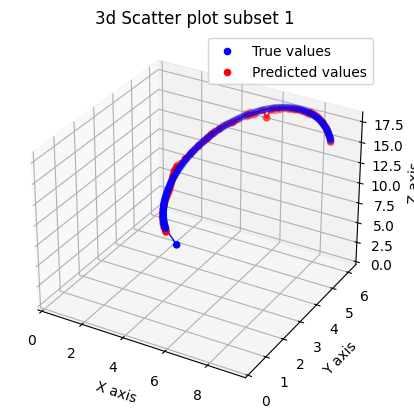

In [134]:
from utils.plot_maker_gaussian_process import plot_maker_3d
import numpy as np

plot_maker_3d(np.array(y_test), np.array(y_pred), '3d Scatter plot subset 1')

In [135]:
y_pred = np.array(y_pred)
sigma = np.array(sigma)
y_test = np.array(y_test)

In [136]:
# Get the data for each dimension (x, y, z)
y_pred_x, y_pred_y, y_pred_z = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
sigma_x, sigma_y, sigma_z = sigma[:, 0], sigma[:, 1], sigma[:, 2]
y_test_x, y_test_y, y_test_z = y_test[:, 0], y_test[:, 1], y_test[:, 2]

#### 6.1.2 Gaussian Process In Time with Covariance For Each Dimension

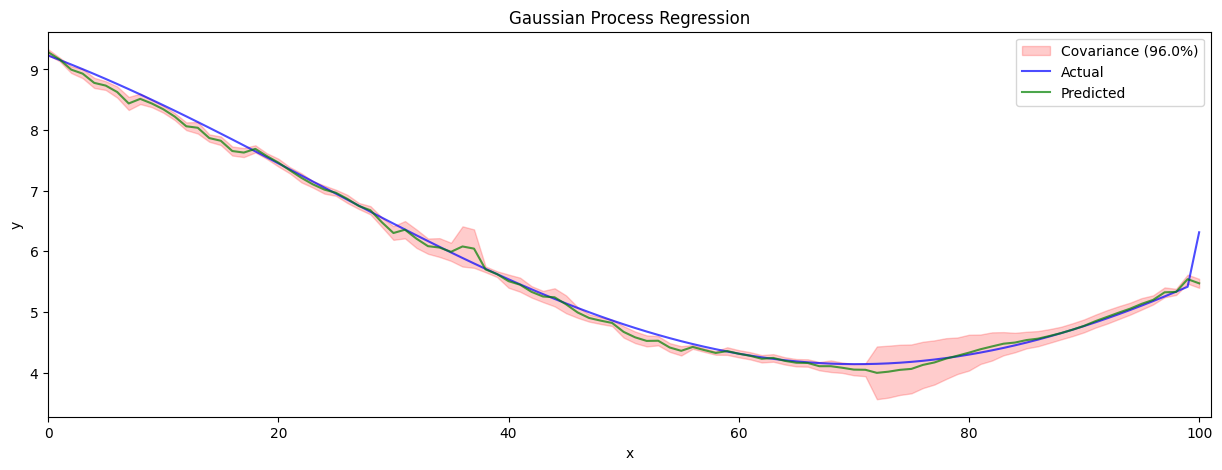

In [137]:
from utils.plot_maker_gaussian_process import gaussian_process_plot
# for the x dimension
gaussian_process_plot(y_test_x, y_pred_x, sigma_x)

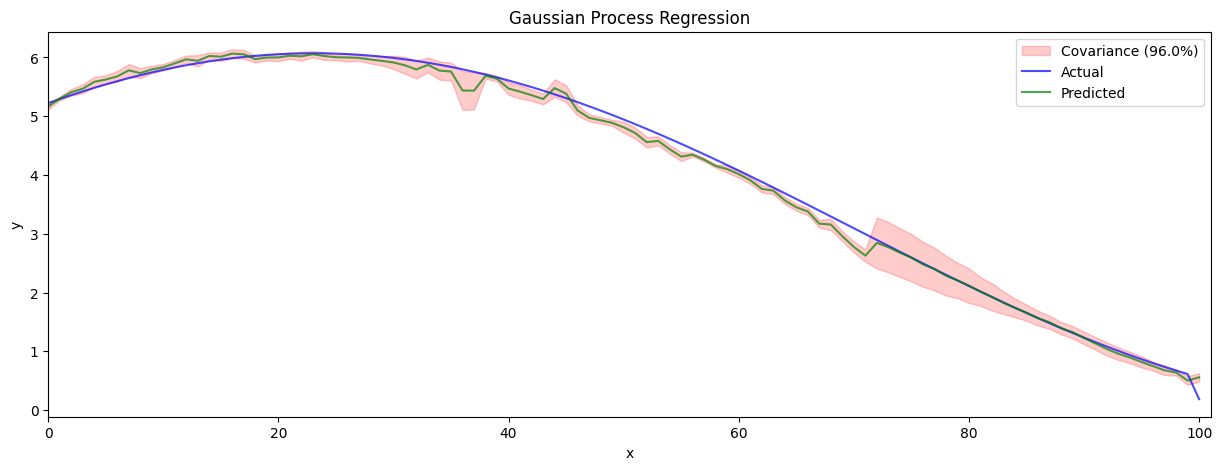

In [138]:
# for the y dimension
gaussian_process_plot(y_test_y, y_pred_y, sigma_y)

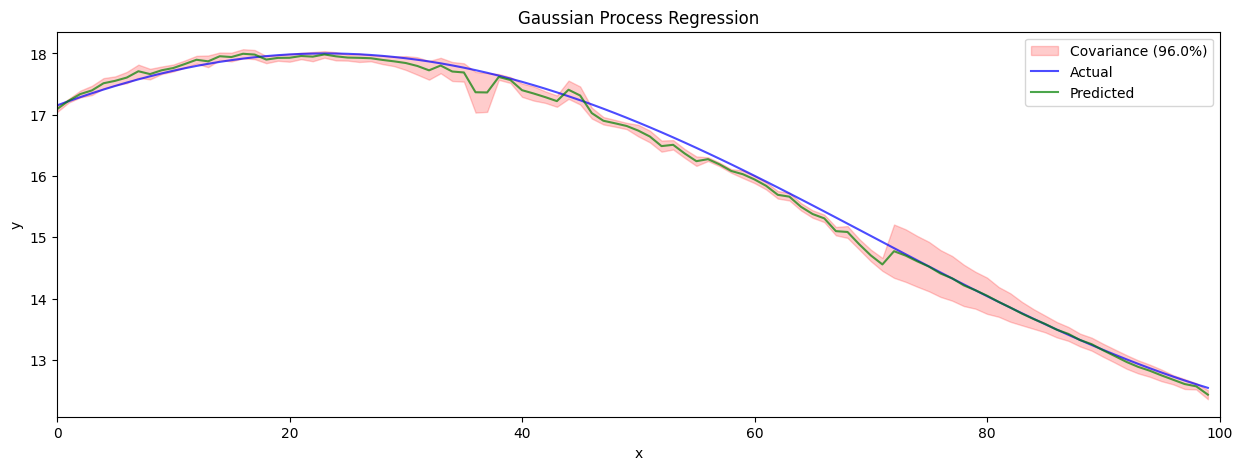

In [139]:
# for the z dimension
gaussian_process_plot(y_test_z[:100], y_pred_z[:100], sigma_z[:100])